<a href="https://colab.research.google.com/github/O-suke12/Arku/blob/master/ReviewWithPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Linear Regression**

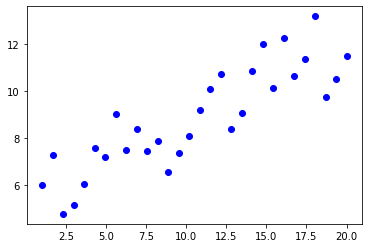

In [ ]:
torch.manual_seed(0)
X_train = torch.linspace(1,20,30)
Y_train = (torch.linspace(4,10,30)+torch.rand(1,30)*4).reshape(30)
X_test = torch.linspace(1,20,10)
Y_test = (torch.linspace(4,10,10)+torch.rand(1,10)*4).reshape(10)
plt.plot(X_train, Y_train,'bo')

In [ ]:
torch.manual_seed(0)
class linear_regression(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, 
                                           requires_grad=True, 
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias

model0 = linear_regression()
model0
list(model0.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True), Parameter containing:
 tensor([-0.2934], requires_grad=True)]

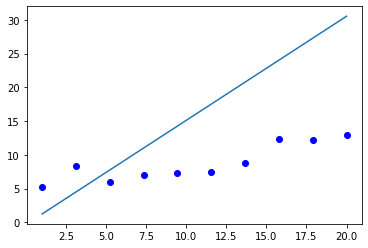

In [ ]:
with torch.inference_mode():
  y_pred = model0(X_test)
y_pred
plt.plot(X_test, y_pred)
plt.plot(X_test, Y_test,'bo')

In [ ]:
Loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model0.parameters(),
                           lr=0.01)

epochs = 100
for epoch in range(epochs):
  model0.train()
  y_pred = model0(X_train)
  loss = Loss_fn(y_pred, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    test_pred = model0(X_test)
    test_loss = Loss_fn(test_pred, Y_test)
  if epoch % 10 == 0:
    print(test_loss)

print(model0.state_dict())

tensor(2.4415)
tensor(2.4288)
tensor(2.4161)
tensor(2.4019)
tensor(2.3859)
tensor(2.3717)
tensor(2.3583)
tensor(2.3441)
tensor(2.3299)
tensor(2.3193)
OrderedDict([('weight', tensor([0.0827])), ('bias', tensor([8.9867]))])


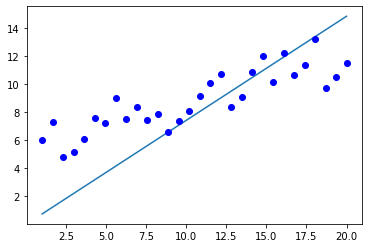

In [ ]:
X = X_train = torch.linspace(1,20,30)
Y = model0.state_dict()["weight"]*X + model0.state_dict()["bias"]
plt.plot(X,Y)
plt.plot(X_train,Y_train, "bo")

# **Binary classification**

In [2]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=43)

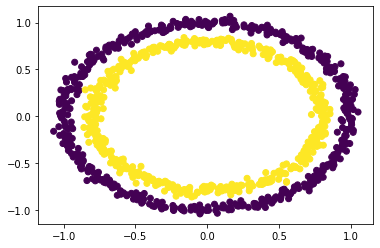

In [3]:
df = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "y": y})
plt.scatter(x=X[:,0], y=X[:,1], c=y)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
class binary_calssification(nn.Module):
  def __init__(self):
    super().__init__()
    # self.layer1 = nn.Linear(in_feature=2, out_feature=5)
    # self.layer2 = nn.Linear(in_feature=5, out_feature=1)
    self.two_layer = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  def forward(self,x):
    # return self.layer2(self.layer1(x))
    return self.two_layer(x)

model1 = binary_calssification()
Loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)
model1.state_dict

<bound method Module.state_dict of binary_calssification(
  (two_layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)>

In [ ]:
print(model1(X[:5]))
print(torch.sigmoid(model1(X[:5])))
print(torch.round(torch.sigmoid(model1(X[:5]))).squeeze())
torch.eq(torch.round(torch.sigmoid(model1(X[:5]))).squeeze(), y[:5].squeeze())

tensor([[0.4251],
        [0.6897],
        [0.3893],
        [0.7084],
        [0.3674]], grad_fn=<AddmmBackward0>)
tensor([[0.6047],
        [0.6659],
        [0.5961],
        [0.6700],
        [0.5908]], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)


tensor([ True,  True, False,  True,  True])

In [11]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
epochs = 100

for epoch in range(epochs):
  
  model1.train()
  y_logits = model1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = Loss_fn(y_logits, y_train)
  #if you use just BCELOSS Loss_fn(sigmoid(y_logits), y_train)
  acc = accuracy_fn(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()#gradient descnet
  
  model1.eval()
  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = Loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | TestLoss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69364, Accuracy: 51.00% | TestLoss: 0.69356, Test Acc: 55.50%
Epoch: 10 | Loss: 0.69358, Accuracy: 51.62% | TestLoss: 0.69361, Test Acc: 55.00%
Epoch: 20 | Loss: 0.69353, Accuracy: 51.62% | TestLoss: 0.69365, Test Acc: 54.50%
Epoch: 30 | Loss: 0.69349, Accuracy: 51.62% | TestLoss: 0.69369, Test Acc: 54.50%
Epoch: 40 | Loss: 0.69345, Accuracy: 51.00% | TestLoss: 0.69373, Test Acc: 54.50%
Epoch: 50 | Loss: 0.69341, Accuracy: 51.88% | TestLoss: 0.69377, Test Acc: 54.00%
Epoch: 60 | Loss: 0.69338, Accuracy: 51.75% | TestLoss: 0.69380, Test Acc: 52.50%
Epoch: 70 | Loss: 0.69335, Accuracy: 51.75% | TestLoss: 0.69384, Test Acc: 54.00%
Epoch: 80 | Loss: 0.69332, Accuracy: 51.50% | TestLoss: 0.69387, Test Acc: 54.50%
Epoch: 90 | Loss: 0.69330, Accuracy: 51.62% | TestLoss: 0.69390, Test Acc: 53.50%


In [ ]:
input = torch.tensor([[[1,2,3],
                     [1,2,3]]])
print(input)
print(input.size())
print(torch.squeeze(input))
print(torch.squeeze(input).size())

tensor([[[1, 2, 3],
         [1, 2, 3]]])
torch.Size([1, 2, 3])
tensor([[1, 2, 3],
        [1, 2, 3]])
torch.Size([2, 3])


In [18]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("already exist")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_decision_boundary

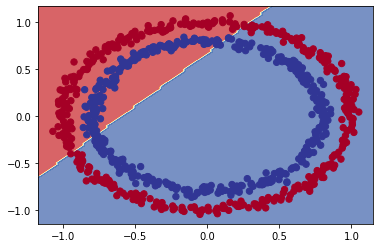

In [ ]:
from helper_function import plot_decision_boundary
plot_decision_boundary(model1, X_train, y_train)

Improvement

In [35]:
class circle_model0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features=10)
    self.layer2 = nn.Linear(in_features = 10, out_features=10)
    self.layer3 = nn.Linear(in_features = 10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,X):
    z = self.layer1(X)
    z = self.relu(z)
    z = self.layer2(z)
    z = self.relu(z)
    z = self.layer3(z)
    return z 

model2 = circle_model0()
Loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)

In [36]:
epochs = 1500
optimizer = torch.optim.SGD(model2.parameters(),
                            lr = 0.1)

for epoch in range(epochs):
  model2.train()
  y_logits = model2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = Loss_fn(y_logits, y_train)
  acc = accuracy_fn( y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = Loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | TestLoss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70504, Accuracy: 49.50% | TestLoss: 0.69791, Test Acc: 52.00%
Epoch: 100 | Loss: 0.69122, Accuracy: 52.62% | TestLoss: 0.69256, Test Acc: 44.50%
Epoch: 200 | Loss: 0.68703, Accuracy: 57.38% | TestLoss: 0.68986, Test Acc: 57.50%
Epoch: 300 | Loss: 0.68279, Accuracy: 64.12% | TestLoss: 0.68705, Test Acc: 65.50%
Epoch: 400 | Loss: 0.67795, Accuracy: 65.38% | TestLoss: 0.68398, Test Acc: 63.50%
Epoch: 500 | Loss: 0.67198, Accuracy: 61.00% | TestLoss: 0.68005, Test Acc: 62.00%
Epoch: 600 | Loss: 0.66448, Accuracy: 61.25% | TestLoss: 0.67537, Test Acc: 61.50%
Epoch: 700 | Loss: 0.65530, Accuracy: 61.62% | TestLoss: 0.66946, Test Acc: 62.50%
Epoch: 800 | Loss: 0.64279, Accuracy: 63.00% | TestLoss: 0.66074, Test Acc: 64.50%
Epoch: 900 | Loss: 0.62173, Accuracy: 68.38% | TestLoss: 0.64440, Test Acc: 68.50%
Epoch: 1000 | Loss: 0.57490, Accuracy: 80.88% | TestLoss: 0.60248, Test Acc: 77.50%
Epoch: 1100 | Loss: 0.50017, Accuracy: 82.38% | TestLoss: 0.52610, Test Acc: 78.50%
Epoc

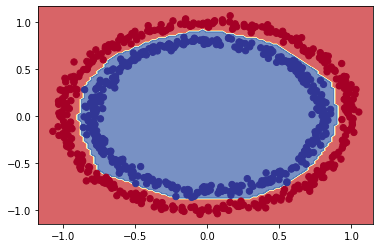

In [37]:
from helper_function import plot_decision_boundary
plot_decision_boundary(model2, X_train, y_train)